**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

###**Importing Skin Cancer Data**

####To do: Take necessary actions to read the data

##Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The 

*   List item
*   List item

dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
#Defining the path for train and test images
##Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

##**Create a dataset**

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#**Visualize the data**

Todo, create a code to visualize one instance of all the nine classes present in the dataset


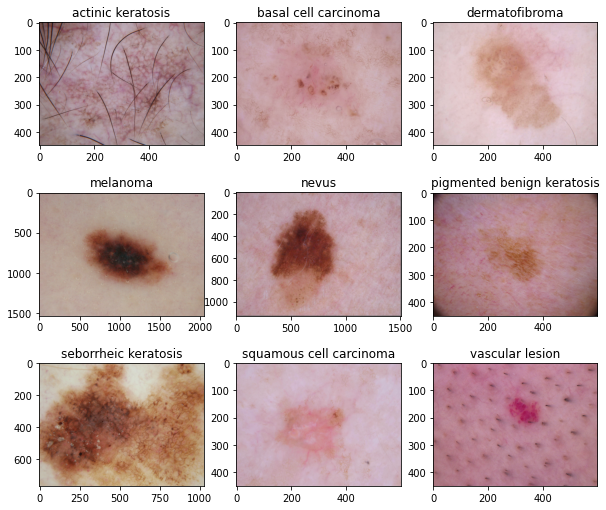

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10, 12))
for i in range(len(class_names)):
    plt.subplot(4, 3, i+1)
    if len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))) > 0:
      image= mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
      plt.title(class_names[i])
      plt.imshow(image)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 

The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#**Create the model**

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = len(class_names)
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

#**Train the model**

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [ ]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 266s 974ms/step - loss: 2.0595 - accuracy: 0.1864 - val_loss: 2.0182 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 4s 66ms/step - loss: 2.0298 - accuracy: 0.2015 - val_loss: 2.0118 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 4s 67ms/step - loss: 1.9723 - accuracy: 0.2651 - val_loss: 1.8648 - val_accuracy: 0.2864
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: 1.8230 - accuracy: 0.3393 - val_loss: 1.7861 - val_accuracy: 0.3669
Epoch 5/20
56/56 [==============================] - 4s 66ms/step - loss: 1.7166 - accuracy: 0.3845 - val_loss: 1.6000 - val_accuracy: 0.4385
Epoch 6/20
56/56 [==============================] - 4s 68ms/step - loss: 1.6346 - accuracy: 0.4018 - val_loss: 1.6959 - val_accuracy: 0.3781
Epoch 7/20
56/56 [==============================] - 4s 67ms/step - loss: 1.6052 - accuracy: 0.4135 - val_loss: 1.6583 - val_accuracy: 0.4004
Epoch 8/20

#**Visualizing training results**

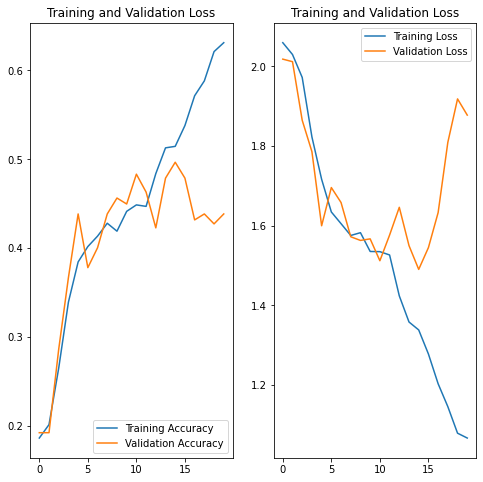

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Model Overfit or Underfit?

*   Model is clearly overfitting as seen above
*   Accuracy of the model is increasing for training data set.
*   The similar observation can be seen in Loss calculation, validation Loss decreased to the certain point but started increasing after 10 epochs.



###Write your findings here.

In [ ]:
# after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), fill_mode='reflect')
])

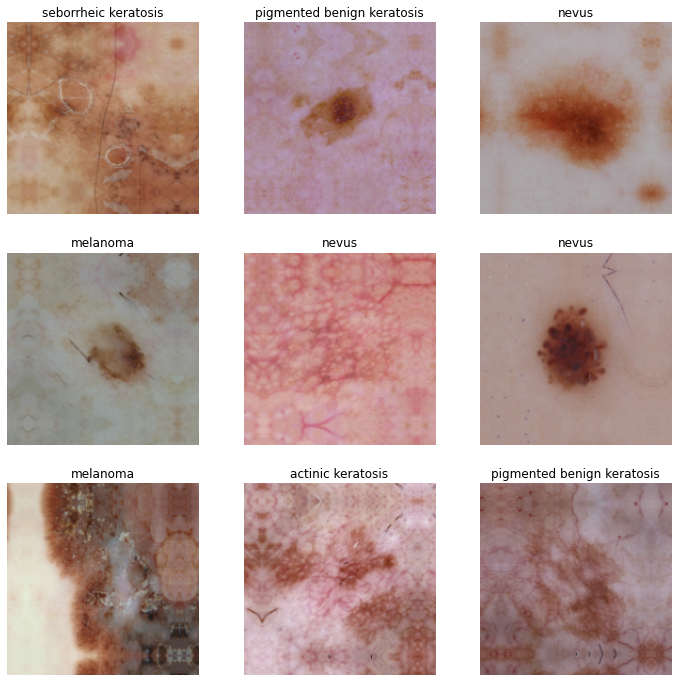

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#**Create the model, compile and train the model**

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = len(class_names)
model = Sequential([data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

##**Compiling the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##**Training the Model**

In [ ]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 16s 212ms/step - loss: 2.0574 - accuracy: 0.1959 - val_loss: 2.0345 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 12s 212ms/step - loss: 2.0372 - accuracy: 0.2182 - val_loss: 2.0416 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 12s 212ms/step - loss: 2.0261 - accuracy: 0.1886 - val_loss: 2.0263 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 12s 211ms/step - loss: 2.0175 - accuracy: 0.2070 - val_loss: 2.0241 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 12s 210ms/step - loss: 2.0170 - accuracy: 0.2065 - val_loss: 2.0393 - val_accuracy: 0.2103
Epoch 6/20
56/56 [==============================] - 11s 194ms/step - loss: 2.0074 - accuracy: 0.2188 - val_loss: 1.9880 - val_accuracy: 0.2237
Epoch 7/20
56/56 [==============================] - 12s 208ms/step - loss: 1.9187 - accuracy: 0.2673 - val_loss: 1.8730 - val_accuracy: 0.2953
Epoch 8/20

##**Visualizing the results**

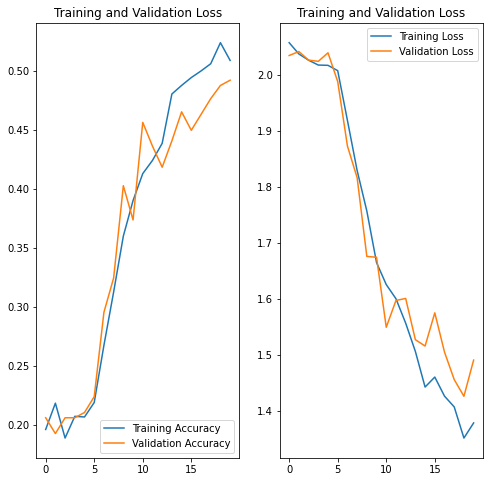

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo**: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

*   The model is now underfitting, but the results are almost similar for training and validation data set.
*   Loss is also decreasing with more training.


**Todo**: Find the distribution of classes in the training dataset.

**Context**: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
path_list=[]
lesion_list=[]
for i in class_names:
  for j in data_dir_train.glob(i + '/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns= ['Path', 'Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Content/CNN_assignment...,actinic keratosis
1,/content/gdrive/MyDrive/Content/CNN_assignment...,actinic keratosis
2,/content/gdrive/MyDrive/Content/CNN_assignment...,actinic keratosis
3,/content/gdrive/MyDrive/Content/CNN_assignment...,actinic keratosis
4,/content/gdrive/MyDrive/Content/CNN_assignment...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Content/CNN_assignment...,vascular lesion
2235,/content/gdrive/MyDrive/Content/CNN_assignment...,vascular lesion
2236,/content/gdrive/MyDrive/Content/CNN_assignment...,vascular lesion
2237,/content/gdrive/MyDrive/Content/CNN_assignment...,vascular lesion


<BarContainer object of 9 artists>

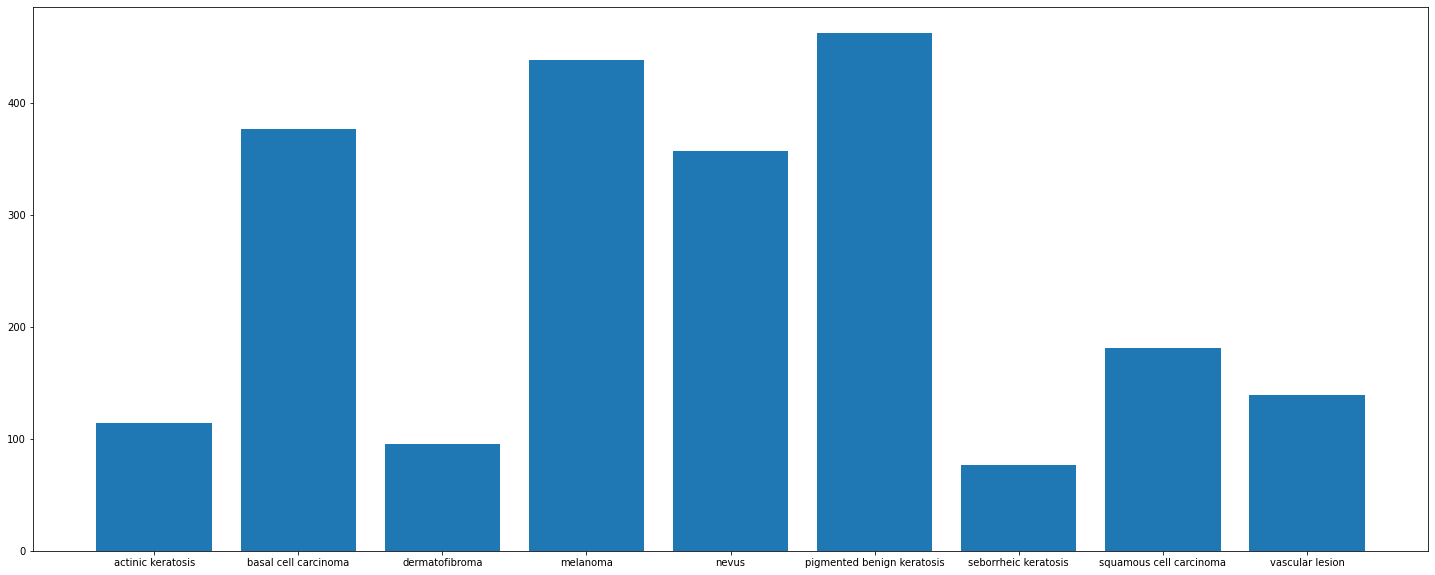

In [ ]:
count = []
for i in class_names:
  count.append(len(list(data_dir_train.glob(i + '/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names, count)

Todo: Write your findings here:

- Seborrheic Keratosis has the least count.

- Pigmented Benign Keratosis dominates the data in terms proportionate number of samples.

**Todo**: Rectify the class imbalance

**Context**: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.

2. Define a number of operations to perform on this data set using your Pipeline object.

3. Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/"
import Augmentor
for i in class_names:
  if i !=".ipynb_checkpoints":
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability =0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F97805893D0>: 100%|██████████| 500/500 [00:20<00:00, 24.31 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9780570B50>: 100%|██████████| 500/500 [00:21<00:00, 22.80 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9780530430>: 100%|██████████| 500/500 [00:20<00:00, 24.49 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9780565F40>: 100%|██████████| 500/500 [01:39<00:00,  5.03 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=796x682 at 0x7F97A605CD60>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9780666310>: 100%|██████████| 500/500 [00:20<00:00, 24.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F97A60B0CA0>: 100%|██████████| 500/500 [00:47<00:00, 10.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F98200D0790>: 100%|██████████| 500/500 [00:20<00:00, 24.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F97A60CC730>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


###**Lets see the distribution of augmented data after adding new images to the original training data.**

In [ ]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030800.jpg_0ab960c7-5f64-468d-8200-62221075b704.jpg',
 '/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029123.jpg_5586e933-b172-4534-b385-1585c8e89aa2.jpg',
 '/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027915.jpg_412c07ae-ff41-4f46-ab15-1879f37d34aa.jpg',
 '/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027609.jpg_b42aab0b-391c-4eb7-839b-af2f072732ff.jpg',
 '/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028457.jpg_c6f9f976-d850-4023-bc14-902b9be04831.jpg',
 '/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/basal ce

In [ ]:

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new
     

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

**Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

**Todo**: Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Content/CNN_assignment/Skin_cancer/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Todo**: Create a validation dataset


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Todo**: Create your model (make sure to include normalization)

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = len(class_names)
model = Sequential([data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

**Todo**: Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Todo**: Train your model

In [ ]:
epochs = 50

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/50


169/169 [==============================] - 68s 369ms/step - loss: 2.1463 - accuracy: 0.1563 - val_loss: 1.8634 - val_accuracy: 0.2710
Epoch 2/50
169/169 [==============================] - 66s 383ms/step - loss: 1.8789 - accuracy: 0.2582 - val_loss: 1.9307 - val_accuracy: 0.2873
Epoch 3/50
169/169 [==============================] - 66s 384ms/step - loss: 1.7666 - accuracy: 0.3014 - val_loss: 1.7617 - val_accuracy: 0.3088
Epoch 4/50
169/169 [==============================] - 61s 356ms/step - loss: 1.7069 - accuracy: 0.3437 - val_loss: 1.9097 - val_accuracy: 0.2977
Epoch 5/50
169/169 [==============================] - 64s 374ms/step - loss: 1.6318 - accuracy: 0.3778 - val_loss: 1.6031 - val_accuracy: 0.3756
Epoch 6/50
169/169 [==============================] - 65s 376ms/step - loss: 1.5593 - accuracy: 0.3904 - val_loss: 1.6265 - val_accuracy: 0.3474
Epoch 7/50
169/169 [==============================] - 62s 352ms/step - loss: 1.4623 - accuracy: 0.4284 - val_loss: 1.5280 - val_accuracy: 0.3

**Todo**: Visualize the model results

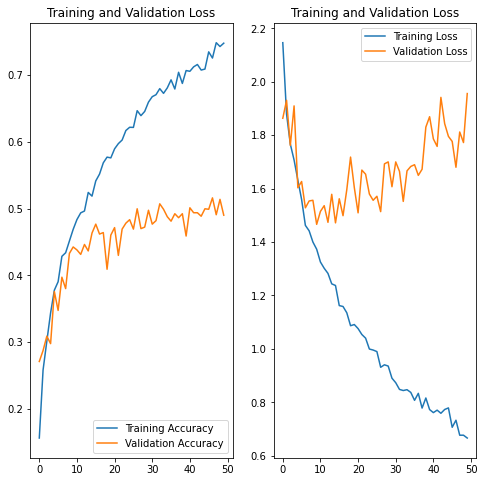

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo**: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

1. There is a slight improvement in the new model.
2. Validation Loss is somewhat constant near 1.6 and validation accuracy seems to be improving.
